# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append('../')
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms(
    count_terms=LAMBDA_TERM_COUNT, down_vertices_limit=DOWNLIMIT,
    up_vertices_limit=UPLIMIT)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f'number of terms with normal form {len(terms)}')

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for
             term in terms]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

Generated terms: 244
LO strategy applying
Remove unormalized terms
Left 100 normalizeble terms
number of lambda terms 100
number of vertices= [53, 59, 52, 53, 53, 51, 58, 53, 57, 59, 51, 56, 52, 55, 56, 56, 57, 59, 51, 57, 58, 54, 56, 53, 51, 55, 53, 52, 54, 53, 52, 56, 52, 53, 55, 55, 59, 58, 52, 51, 56, 51, 52, 59, 56, 51, 55, 52, 59, 58, 54, 51, 51, 52, 51, 52, 54, 53, 59, 57, 51, 58, 57, 54, 52, 58, 53, 58, 53, 59, 58, 55, 56, 51, 56, 52, 53, 54, 55, 52, 59, 57, 59, 51, 56, 51, 52, 58, 58, 55, 59, 59, 56, 57, 58, 51, 57, 59, 51, 52]
number of redexes= [5, 4, 5, 7, 5, 8, 5, 5, 8, 8, 7, 6, 8, 5, 4, 7, 5, 5, 5, 6, 5, 7, 5, 7, 3, 6, 2, 6, 5, 5, 4, 3, 4, 6, 4, 6, 4, 6, 5, 4, 5, 3, 8, 8, 5, 3, 6, 3, 9, 5, 5, 3, 4, 9, 5, 9, 4, 7, 5, 6, 2, 8, 7, 8, 8, 6, 4, 7, 4, 12, 4, 3, 3, 6, 7, 9, 4, 4, 3, 3, 3, 7, 2, 6, 9, 9, 4, 9, 4, 6, 9, 6, 5, 7, 8, 8, 6, 5, 3, 6]
number of steps to normalize using LO strategy= [20, 2, 26, 34, 3, 6, 2, 15, 2, 1, 4, 7, 39, 5, 5, 7, 4, 5, 5, 5, 13, 3, 13, 8, 1, 5, 2,

In [3]:
print('max cound LO: {}'.format(max(stepsLO)))
print('max cound RI: {}'.format(max(stepsRI)))
print('max cound Rand: {}'.format(max(stepsRand)))

max cound LO: 62
max cound RI: inf
max cound Rand: 85.75


In [5]:
max_count_steps_rlenv = 100
strategies_env = [LeftmostOutermostStrategy(),
                  RightmostInnermostStrategy()]

explore_ep = 10  # total 10 * 2 (strategies) = 20
epsilon = .1

In [6]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

lambda_env, rewards_greedy = run_greedy_policy(lambda_env,
                                               exploration=explore_ep,
                                               max_term_reward=max_count_steps_rlenv)

In [7]:
lambda_env.reset_soft()
lambda_env, rewards_e_greedy = \
    run_e_greedy_policy(lambda_env,
                        exploration=explore_ep,
                        max_term_reward=max_count_steps_rlenv,
                        epsilon=epsilon,
                        deterministic=True)

In [8]:
lambda_env.reset_soft()
lambda_env, rewards_e_greedy_non_d = \
    run_e_greedy_policy(lambda_env,
                        exploration=explore_ep,
                        max_term_reward=max_count_steps_rlenv,
                        epsilon=epsilon,
                        deterministic=False)

In [9]:
steps_greedy = [max_count_steps_rlenv - rew for rew in rewards_greedy]
steps_e_greedy = [max_count_steps_rlenv - rew for rew in rewards_e_greedy]
steps_e_greedy_non_d = [max_count_steps_rlenv - rew for rew in rewards_e_greedy_non_d]

In [10]:
print("count steps to norm by Greedy policy = {}".format(steps_greedy))
print("count steps to norm by e-Greedy policy = {}".format(steps_e_greedy))
print("count steps to norm by e-Greedy policy non det = {}".format(steps_e_greedy_non_d))

count steps to norm by Greedy policy = [9, 10, 5, 100, 11, 7, 5, 14, 7, 11, 4, 14, 7, 13, 12, 5, 5, 6, 19, 7, 5, 7, 100, 2, 4, 5, 4, 3, 5, 2, 4, 3, 6, 99, 11, 8, 7, 13, 100, 10, 5, 3, 8, 13, 100, 23, 4, 3, 7, 5, 2, 5, 2, 29, 100, 100, 100, 12, 5, 21, 100, 35, 10, 100, 100, 5, 9, 4, 4, 8, 7, 100, 11, 6, 7, 6, 100, 38, 6, 100, 12, 6, 6, 7, 100, 6, 100, 5, 3, 8, 5, 5, 8, 3, 12, 9, 23, 12, 100, 4]
count steps to norm by e-Greedy policy = [12, 21, 7, 11, 7, 20, 3, 100, 6, 21, 3, 100, 10, 6, 5, 12, 42, 7, 100, 8, 16, 9, 2, 5, 2, 36, 4, 9, 4, 5, 11, 21, 5, 100, 100, 100, 8, 100, 100, 4, 4, 6, 4, 3, 10, 14, 5, 7, 13, 9, 6, 5, 100, 3, 100, 19, 3, 6, 100, 4, 20, 7, 100, 5, 8, 6, 5, 4, 8, 3, 3, 3, 35, 12, 3, 25, 16, 10, 24, 100, 2, 4, 10, 7, 16, 21, 6, 100, 3, 19, 16, 100, 10, 7, 4, 5, 9, 4, 7, 100]
count steps to norm by e-Greedy policy non det = [6, 8, 26, 10, 100, 13, 5, 11, 100, 16, 21, 6, 4, 11, 100, 12, 7, 5, 5, 3, 20, 2, 15, 9, 8, 7, 100, 100, 15, 10, 100, 100, 27, 5, 4, 7, 25, 9, 6, 8, 9,

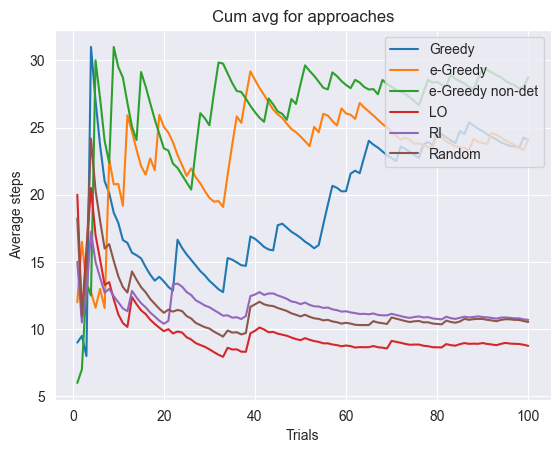

In [11]:
comp_data = {"Greedy": (steps_greedy, "-"),
             "e-Greedy": (steps_e_greedy, "-"),
             "e-Greedy non-det": (steps_e_greedy_non_d, "-"),
             "LO": (stepsLO, "-"),
             "RI": ([step if step != np.inf else 70 for step in stepsRI], "-"),
             "Random": (stepsRand, "-")}

draw_cumulative_avg_comparison(comp_data)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.29it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.047327  1144.592834 -751.768228     inf      0.132367   
gamma            0.053789  1125.213859 -738.969710     inf      0.186196   
chi2             0.056250  1075.725436 -734.495660     inf      0.235640   
exponpow         0.058773  1031.952251 -730.109096     inf      0.323554   
powerlaw         0.063664  1018.643152 -722.114899     inf      0.267851   

             ks_pvalue  
lognorm   5.471464e-02  
gamma     1.653806e-03  
chi2      2.282756e-05  
exponpow  8.101623e-10  
powerlaw  7.966464e-07  
{'lognorm': {'s': 1.4976892837189726, 'loc': 1.8020377242415009, 'scale': 7.438217144396585}}
Norm distribution: (24.06, 34.871139929747066)


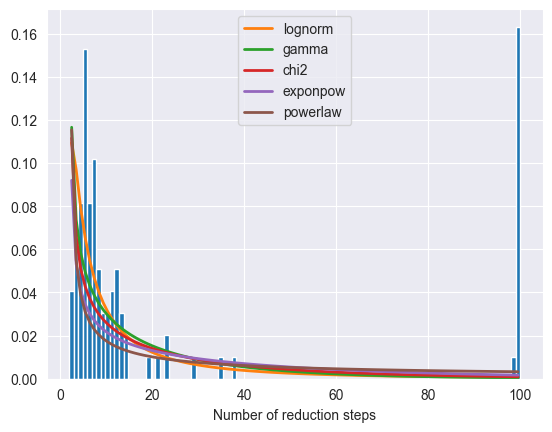

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 40.60it/s]

Log Norm distribution params: (2.3837309979112975, 1.1555181438151825); expected value = 21.143702103275068


In [12]:
draw_hist(steps_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.77it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.039208  1139.246042 -770.589487     inf      0.114424   
gamma            0.046212  1124.456548 -754.153197     inf      0.149241   
chi2             0.050981  1055.120951 -744.331945     inf      0.224517   
exponpow         0.051655  1067.945093 -743.018796     inf      0.168211   
powerlaw         0.055382  1025.686907 -736.051140     inf      0.212676   

          ks_pvalue  
lognorm    0.134790  
gamma      0.020780  
chi2       0.000066  
exponpow   0.006083  
powerlaw   0.000190  
{'lognorm': {'s': 1.5090452779750512, 'loc': 1.8301646931986082, 'scale': 7.6705195010700855}}
Norm distribution: (24.1, 33.90648905445682)


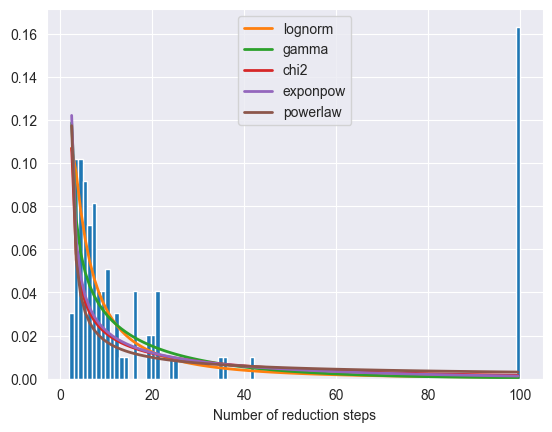

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 42.32it/s]

Log Norm distribution params: (2.4170213024612583, 1.1560322750579155); expected value = 21.872422854751672


In [13]:
draw_hist(steps_e_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 31.74it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.045697  1091.444284 -755.273650     inf      0.132825   
gamma            0.048560  1051.938843 -749.196848     inf      0.196271   
exponpow         0.053292  1026.377667 -739.898054     inf      0.252176   
powerlaw         0.061352   967.096681 -725.814377     inf      0.349417   
rayleigh         0.062458   995.206298 -728.632881     inf      0.364232   

             ks_pvalue  
lognorm   5.337888e-02  
gamma     7.515134e-04  
exponpow  4.314682e-06  
powerlaw  2.034269e-11  
rayleigh  2.136183e-12  
{'lognorm': {'s': 1.3364114203165303, 'loc': 1.5022006872924187, 'scale': 11.940357475512485}}
Norm distribution: (28.75, 35.552601873843216)


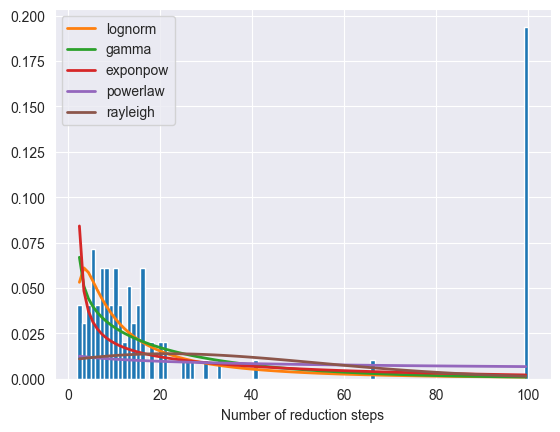

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 38.64it/s]

Log Norm distribution params: (2.6950749906603937, 1.1196372574115494); expected value = 27.712090129890424


In [14]:
draw_hist(steps_e_greedy_non_d)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.51it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.089490  1150.274560 -688.064050     inf      0.086764   
chi2             0.121240  1284.430546 -657.699607     inf      0.216061   
exponpow         0.121432  1199.759240 -657.541216     inf      0.179896   
rayleigh         0.135448  1474.649675 -651.223356     inf      0.272636   
powerlaw         0.144573   912.542305 -640.098315     inf      0.265063   

             ks_pvalue  
lognorm   4.153982e-01  
chi2      1.409177e-04  
exponpow  2.650295e-03  
rayleigh  4.655191e-07  
powerlaw  1.084432e-06  
{'lognorm': {'s': 0.9574669587567977, 'loc': 0.46396942060067653, 'scale': 5.197960460369675}}
Norm distribution: (8.76, 9.807262615021585)


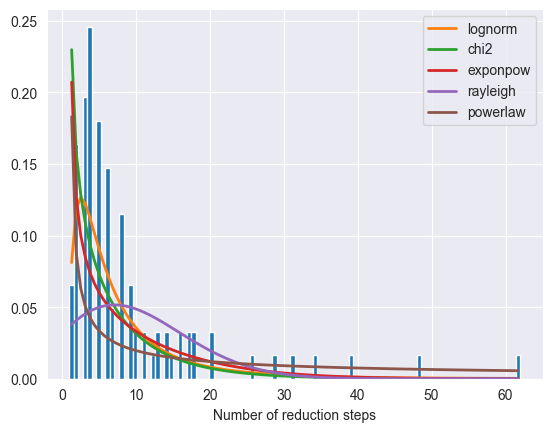

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 31.00it/s]

Log Norm distribution params: (1.7715498678582522, 0.8544589387565329); expected value = 8.47058782319101


In [15]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.93it/s]


number of not normalized terms: 1
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.086298  1288.186685 -683.676356     inf      0.109298   
rayleigh         0.108997  1971.824798 -665.154076     inf      0.249685   
exponpow         0.111722  1272.355925 -658.113657     inf      0.199467   
norm             0.118086  2094.409006 -657.224693     inf      0.208911   
powerlaw         0.143857   916.961296 -633.085959     inf      0.369966   

             ks_pvalue  
lognorm   1.743276e-01  
rayleigh  6.341108e-06  
exponpow  6.284399e-04  
norm      2.872178e-04  
powerlaw  1.151321e-12  
{'lognorm': {'s': 0.6899697967281399, 'loc': 0.8494289923858197, 'scale': 7.190721050434423}}
Norm distribution: (10.090909090909092, 8.290302122031731)


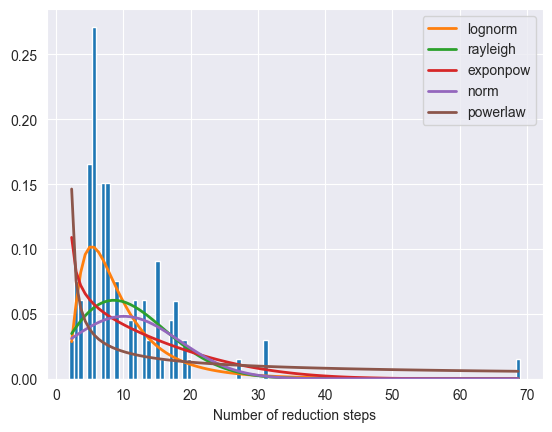

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 22.92it/s]

Log Norm distribution params: (2.1076306064297126, 0.607273846480006); expected value = 9.894918759261577


In [16]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 31.61it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.011736  1295.811230 -891.211740     inf      0.060559   
exponpow         0.034966  1400.495382 -782.039162     inf      0.174177   
rayleigh         0.047400  1909.749195 -756.220764     inf      0.260576   
chi2             0.049140  1478.994304 -748.009808     inf      0.221435   
norm             0.055379  1959.006119 -740.662458     inf      0.234120   

          ks_pvalue  
lognorm    0.834930  
exponpow   0.004008  
rayleigh   0.000002  
chi2       0.000087  
norm       0.000026  
{'lognorm': {'s': 0.9686340535330731, 'loc': 1.5718352799319009, 'scale': 5.485607005431438}}
Norm distribution: (10.5305, 11.499510630892082)


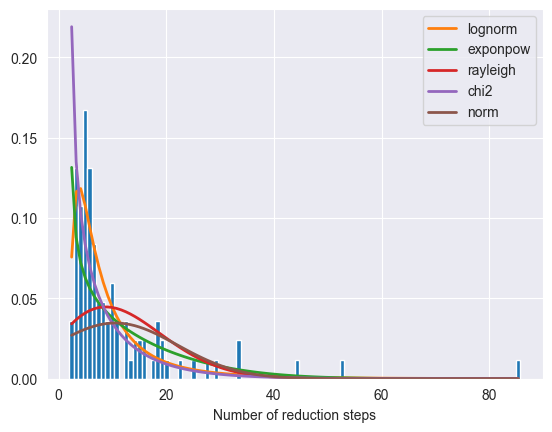

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 45.45it/s]

Log Norm distribution params: (2.0317330372856675, 0.7349613094194639); expected value = 9.992323022941957


In [17]:
draw_hist(stepsRand)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.62it/s]


expected number of steps to normalize using Mixed strategy= 9.294980142265995


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.86it/s]


expected number of steps to normalize using Mixed strategy= 10.076922973780986


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.68it/s]


expected number of steps to normalize using Mixed strategy= 9.854066944501218


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.45it/s]


expected number of steps to normalize using Mixed strategy= 9.17268907224887


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.64it/s]


expected number of steps to normalize using Mixed strategy= 9.965249083761789


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.81it/s]


expected number of steps to normalize using Mixed strategy= 9.184534400378277


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 48.90it/s]


expected number of steps to normalize using Mixed strategy= 10.18727149418917


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.54it/s]


expected number of steps to normalize using Mixed strategy= 9.865951471256254


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.80it/s]


expected number of steps to normalize using Mixed strategy= 9.196886462117385


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.38it/s]


expected number of steps to normalize using Mixed strategy= 10.207413669927943


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.95it/s]


expected number of steps to normalize using Mixed strategy= 8.80838738079197


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 45.68it/s]


expected number of steps to normalize using Mixed strategy= 10.081372435346747


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.43it/s]


expected number of steps to normalize using Mixed strategy= 8.90484816393628


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.85it/s]


expected number of steps to normalize using Mixed strategy= 9.707738186900084


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.62it/s]


expected number of steps to normalize using Mixed strategy= 10.19061644923032


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.64it/s]


expected number of steps to normalize using Mixed strategy= 9.736862280917963


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.47it/s]


expected number of steps to normalize using Mixed strategy= 9.642114960335178


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.22it/s]


expected number of steps to normalize using Mixed strategy= 8.829323788030138


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.62it/s]


expected number of steps to normalize using Mixed strategy= 9.845300232570175


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.14it/s]


expected number of steps to normalize using Mixed strategy= 10.061587493148059
gen	nevals	min    	avg    
0  	20    	8.80839	9.64071


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 47.61it/s]


expected number of steps to normalize using Mixed strategy= 9.84466025105581


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.56it/s]


expected number of steps to normalize using Mixed strategy= 8.932874917396035


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.49it/s]


expected number of steps to normalize using Mixed strategy= 9.25979308427089


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.28it/s]


expected number of steps to normalize using Mixed strategy= 8.887784316287556


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.14it/s]


expected number of steps to normalize using Mixed strategy= 10.027854623130814


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.28it/s]


expected number of steps to normalize using Mixed strategy= 8.896536637325108


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 47.86it/s]


expected number of steps to normalize using Mixed strategy= 9.654472026119791


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 47.61it/s]


expected number of steps to normalize using Mixed strategy= 9.948524245325816


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 9.11938047768596


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.66it/s]


expected number of steps to normalize using Mixed strategy= 8.771899132813523


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.71it/s]


expected number of steps to normalize using Mixed strategy= 9.27715798482746


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 8.779940326563729


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.44it/s]


expected number of steps to normalize using Mixed strategy= 8.823924179336851


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.29it/s]


expected number of steps to normalize using Mixed strategy= 8.60590381674228
1  	14    	8.77994	11.1482


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.72it/s]


expected number of steps to normalize using Mixed strategy= 8.761383614591447


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.73it/s]


expected number of steps to normalize using Mixed strategy= 8.743781754949683


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.14it/s]


expected number of steps to normalize using Mixed strategy= 8.78949745708251


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.57it/s]


expected number of steps to normalize using Mixed strategy= 8.835754244980457


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.81it/s]


expected number of steps to normalize using Mixed strategy= 8.955778638758739


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.85it/s]


expected number of steps to normalize using Mixed strategy= 9.172400623235475


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.14it/s]


expected number of steps to normalize using Mixed strategy= 8.872204176291195


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 47.36it/s]


expected number of steps to normalize using Mixed strategy= 9.247904364021878


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.09it/s]


expected number of steps to normalize using Mixed strategy= 8.921603928891495


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.38it/s]


expected number of steps to normalize using Mixed strategy= 9.954766363011828


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.81it/s]


expected number of steps to normalize using Mixed strategy= 8.779790906283022


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.29it/s]


expected number of steps to normalize using Mixed strategy= 8.75248619538428


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.12it/s]


expected number of steps to normalize using Mixed strategy= 9.129953465001565


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.05it/s]


expected number of steps to normalize using Mixed strategy= 8.892329682763584


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.09it/s]


expected number of steps to normalize using Mixed strategy= 8.907604493251622
2  	15    	8.75249	8.97865


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.44it/s]


expected number of steps to normalize using Mixed strategy= 8.779698575110222


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.90it/s]


expected number of steps to normalize using Mixed strategy= 8.795034737945453


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 8.75897439616235


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.90it/s]


expected number of steps to normalize using Mixed strategy= 8.849720784212375


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.66it/s]


expected number of steps to normalize using Mixed strategy= 8.894345270632295


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.85it/s]


expected number of steps to normalize using Mixed strategy= 8.810852420287087


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.12it/s]


expected number of steps to normalize using Mixed strategy= 8.75743113898488


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 8.761455994287658


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.65it/s]


expected number of steps to normalize using Mixed strategy= 8.789168778897356


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.03it/s]


expected number of steps to normalize using Mixed strategy= 8.865205361475752


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.44it/s]


expected number of steps to normalize using Mixed strategy= 8.86468677752871


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 8.824281987314261


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.45it/s]


expected number of steps to normalize using Mixed strategy= 8.956131940760017


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.45it/s]


expected number of steps to normalize using Mixed strategy= 8.780995481889981


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.49it/s]


expected number of steps to normalize using Mixed strategy= 8.792105023273482
3  	15    	8.75249	9.64191


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.20it/s]


expected number of steps to normalize using Mixed strategy= 8.798907292528018


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.88it/s]


expected number of steps to normalize using Mixed strategy= 8.77045060070455


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.28it/s]


expected number of steps to normalize using Mixed strategy= 8.793431332247257


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.71it/s]


expected number of steps to normalize using Mixed strategy= 8.813656379264023


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.05it/s]


expected number of steps to normalize using Mixed strategy= 8.756992028439655


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.88it/s]


expected number of steps to normalize using Mixed strategy= 8.775069458946016


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.57it/s]


expected number of steps to normalize using Mixed strategy= 8.771238425163858


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.29it/s]


expected number of steps to normalize using Mixed strategy= 8.832343007776974


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.28it/s]


expected number of steps to normalize using Mixed strategy= 8.808898452960142


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.99it/s]


expected number of steps to normalize using Mixed strategy= 8.764328359728609


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.45it/s]


expected number of steps to normalize using Mixed strategy= 8.791508122972132


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.99it/s]


expected number of steps to normalize using Mixed strategy= 8.746546692083026


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.81it/s]


expected number of steps to normalize using Mixed strategy= 8.764584901875603


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.58it/s]


expected number of steps to normalize using Mixed strategy= 8.763467667052465


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 8.742045166185655


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.95it/s]


expected number of steps to normalize using Mixed strategy= 8.833175325342117
4  	16    	8.75249	10.5787


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.12it/s]


expected number of steps to normalize using Mixed strategy= 8.794703806172528


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.66it/s]


expected number of steps to normalize using Mixed strategy= 8.713933573121482


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.46it/s]


expected number of steps to normalize using Mixed strategy= 8.813310796725895


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.65it/s]


expected number of steps to normalize using Mixed strategy= 8.776809364249583


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.44it/s]


expected number of steps to normalize using Mixed strategy= 8.821883279005041


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.43it/s]


expected number of steps to normalize using Mixed strategy= 8.731252849922216


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.48it/s]


expected number of steps to normalize using Mixed strategy= 8.847661687879897


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.28it/s]


expected number of steps to normalize using Mixed strategy= 8.80949223004427


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.18it/s]


expected number of steps to normalize using Mixed strategy= 8.726322702868337


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.18it/s]


expected number of steps to normalize using Mixed strategy= 8.784149989722849


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.17it/s]


expected number of steps to normalize using Mixed strategy= 8.781819725881745
5  	11    	8.71393	9.63902


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.29it/s]


expected number of steps to normalize using Mixed strategy= 8.718832294235627


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 8.809167380973722


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 8.768650482092061


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.81it/s]


expected number of steps to normalize using Mixed strategy= 8.801025083187492


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.20it/s]


expected number of steps to normalize using Mixed strategy= 8.777587682335998


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.81it/s]


expected number of steps to normalize using Mixed strategy= 8.811776109094744


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.08it/s]


expected number of steps to normalize using Mixed strategy= 8.798418767429034


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.81it/s]


expected number of steps to normalize using Mixed strategy= 8.775847639301636


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.85it/s]


expected number of steps to normalize using Mixed strategy= 8.719755127812224


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 8.622783753731202


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.81it/s]


expected number of steps to normalize using Mixed strategy= 8.811752670140631


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 8.722442529956984


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.41it/s]


expected number of steps to normalize using Mixed strategy= 8.73013120578199


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.64it/s]


expected number of steps to normalize using Mixed strategy= 8.733299794525001


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.73it/s]


expected number of steps to normalize using Mixed strategy= 8.760816580752286


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.73it/s]


expected number of steps to normalize using Mixed strategy= 8.755724077236453
6  	16    	8.71393	9.9895 


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.84it/s]


expected number of steps to normalize using Mixed strategy= 8.741542239703387


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.90it/s]


expected number of steps to normalize using Mixed strategy= 8.74292290828961


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.47it/s]


expected number of steps to normalize using Mixed strategy= 8.723690076649115


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.03it/s]


expected number of steps to normalize using Mixed strategy= 8.733257318520224


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.53it/s]


expected number of steps to normalize using Mixed strategy= 8.733526797760167


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.43it/s]


expected number of steps to normalize using Mixed strategy= 8.677360098587044


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.49it/s]


expected number of steps to normalize using Mixed strategy= 8.779248364310918


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.03it/s]


expected number of steps to normalize using Mixed strategy= 8.817795958731981


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.78it/s]


expected number of steps to normalize using Mixed strategy= 8.7948976187471


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.99it/s]


expected number of steps to normalize using Mixed strategy= 8.688951738712424


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.47it/s]


expected number of steps to normalize using Mixed strategy= 8.498979490356515


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 8.785883815300645


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.84it/s]


expected number of steps to normalize using Mixed strategy= 8.964366632029591


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.95it/s]


expected number of steps to normalize using Mixed strategy= 8.69227230490475


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.64it/s]


expected number of steps to normalize using Mixed strategy= 8.702786917196933


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.88it/s]


expected number of steps to normalize using Mixed strategy= 8.806168500954884
7  	16    	8.67736	8.9508 
- Best solution is: 
p =  [0.8841160984396145, 0.030941405209476414, 0.010565565430321664, 0.04103079358475053]


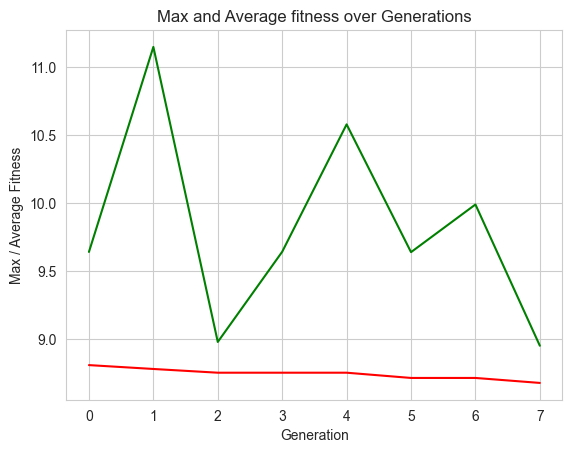

In [18]:
STRATEGIES = [LeftmostOutermostStrategy(), RightmostInnermostStrategy(), LeftmostInnermostStrategy(),
              RightmostOutermostStrategy(), RandomStrategy()]

BOUNDS_LOW = [0.1, 0.0, 0.0, 0.0]
BOUNDS_HIGH = [1.0, 1.0, 1.0, 1.0, ]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3  # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register("hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (toolbox.__getattribute__("hyperparameter_" + str(i)),)


# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
    indv = [0 for _ in range(NUM_OF_PARAMS)]
    for i in range(NUM_OF_PARAMS):
        indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
    return creator.Individual(indv)


# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)


# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in
                  range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
    steps = list(filter(lambda x: x != float('inf'), steps))

    distributions = get_common_distributions()
    distributions.remove('expon')
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    print("expected number of steps to normalize using Mixed strategy= {}".format(result))
    if 1 - sum(individual) < 0:
        result += 100 * (sum(individual) - 1)
    return result,


toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR,
                 indpb=1.0 / NUM_OF_PARAMS)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.77it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.038994  1175.491395 -771.137481     inf      0.074273   
chi2             0.050878  1237.086500 -744.533710     inf      0.116424   
exponpow         0.059264  1275.221238 -729.276097     inf      0.162476   
rayleigh         0.077760  1561.264155 -706.720036     inf      0.255901   
powerlaw         0.087444   916.860236 -690.377671     inf      0.304987   

             ks_pvalue  
lognorm   6.125570e-01  
chi2      1.227058e-01  
exponpow  8.958402e-03  
rayleigh  2.916377e-06  
powerlaw  9.418525e-09  
{'lognorm': {'s': 0.9560692218869196, 'loc': 0.5006923654094507, 'scale': 5.327686000845139}}
Norm distribution: (8.979, 10.013438919771767)


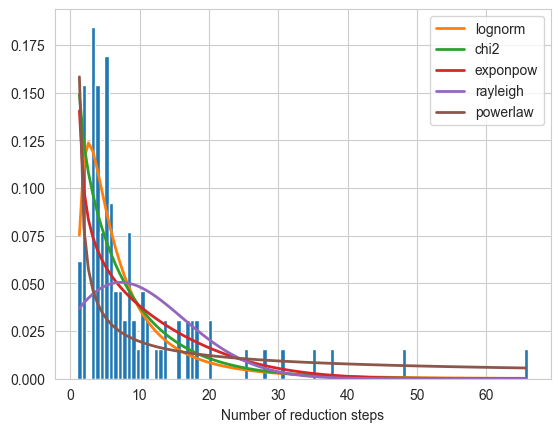

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 31.12it/s]

Log Norm distribution params: (1.80192888831711, 0.8488647898002767); expected value = 8.690362073969537


In [19]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [
    sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
    for term in terms]
draw_hist(MixedStrategySteps)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.95it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.074614  1153.149468 -706.243810     inf      0.084484   
chi2             0.095027  1211.914491 -682.060556     inf      0.164308   
exponpow         0.107073  1205.598866 -670.126174     inf      0.185862   
rayleigh         0.118681  1487.170150 -664.438122     inf      0.271301   
norm             0.130225  1518.577506 -655.155570     inf      0.235217   

             ks_pvalue  
lognorm   4.487529e-01  
chi2      7.928445e-03  
exponpow  1.696278e-03  
rayleigh  5.414041e-07  
norm      2.378467e-05  
{'lognorm': {'s': 0.9566682286579419, 'loc': 0.47148369057276385, 'scale': 5.21720927650383}}
Norm distribution: (8.7865, 9.807430486625943)


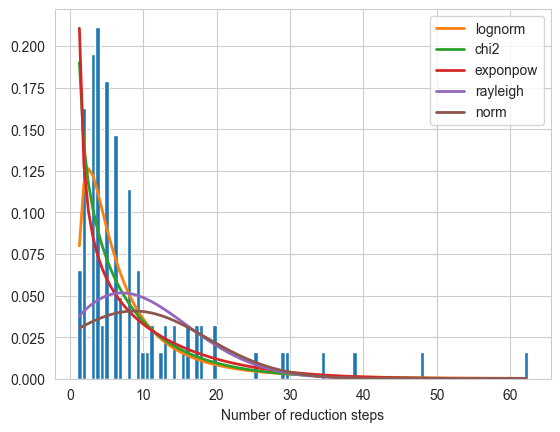

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.62it/s]

Log Norm distribution params: (1.7765595843216497, 0.852723068677949); expected value = 8.500524778600653


In [20]:
p = [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [
    sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
    for term in terms]
draw_hist(steps)

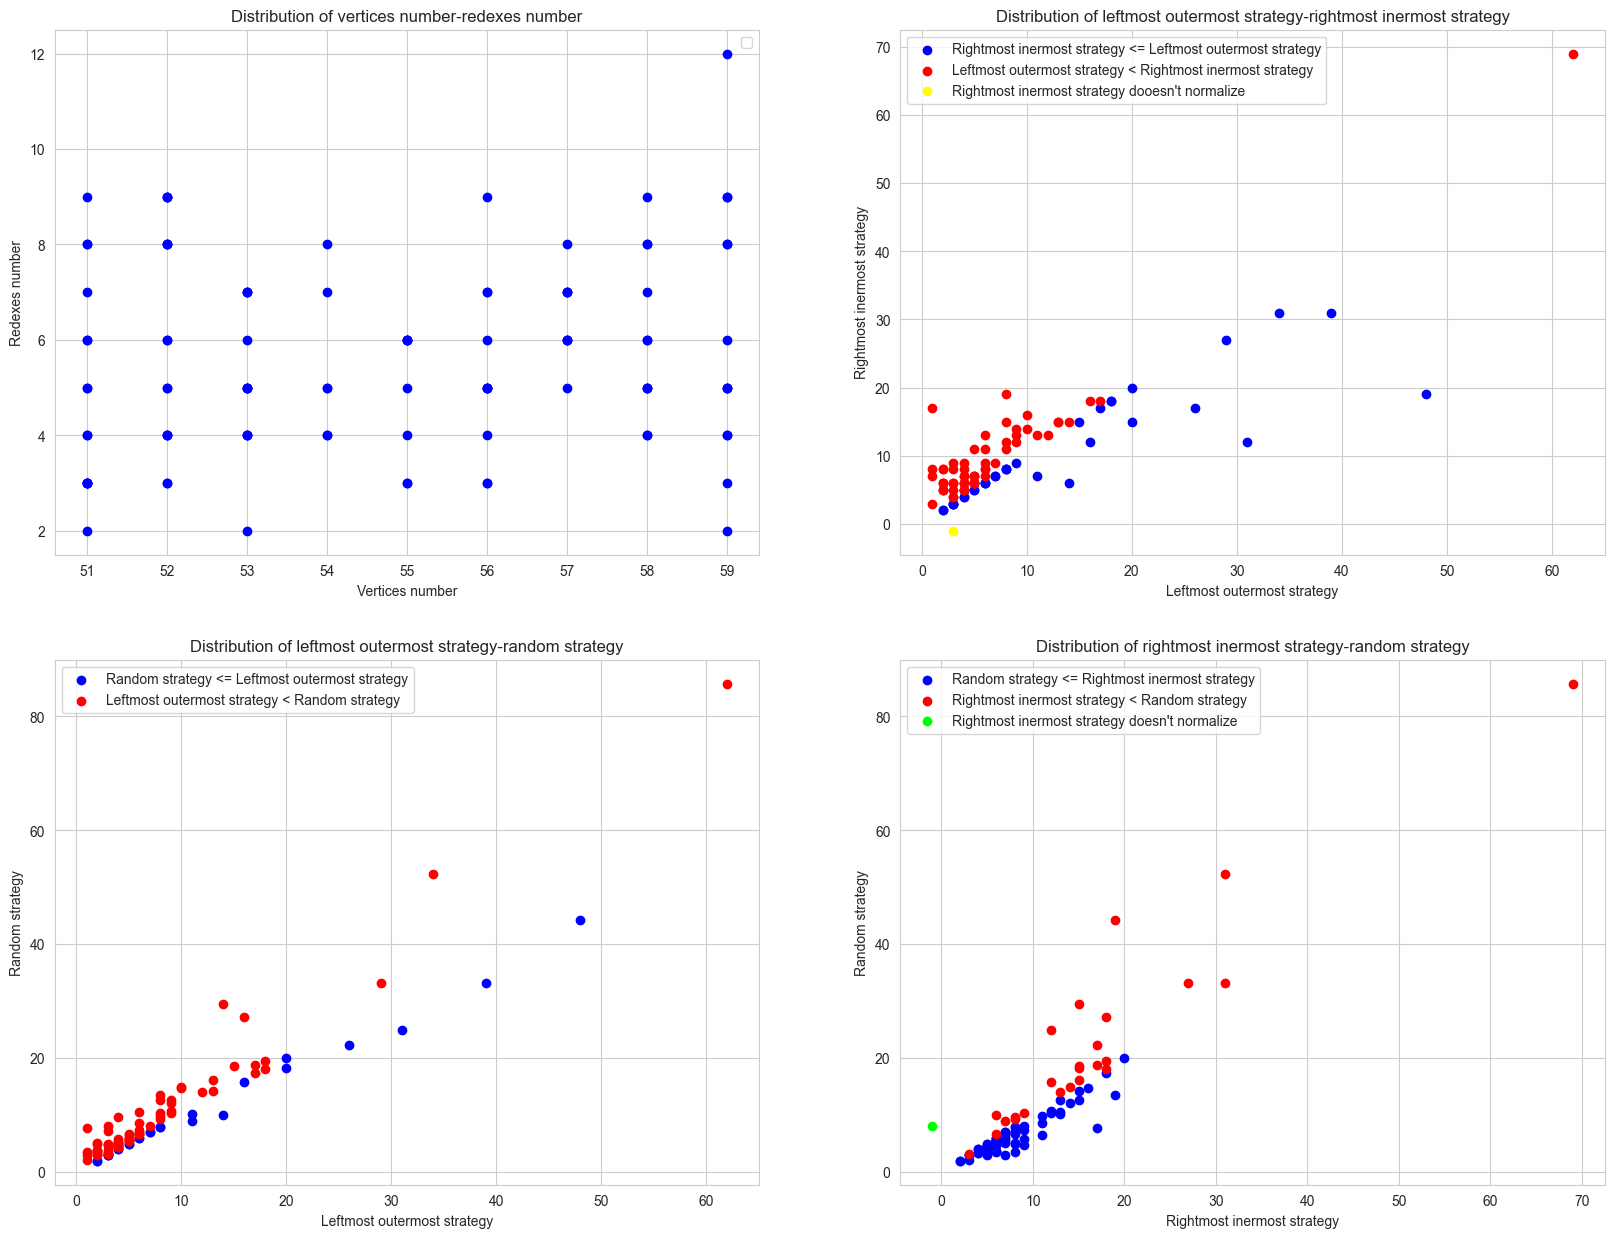

In [21]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax0, ax1, ax2, ax3 = axes.flatten()
draw_2d_distribution(ax0, countVertices, countRedexes, 'Vertices number', 'Redexes number')
draw_2d_strategy_distribution(ax1, stepsLO, stepsRI, 'Leftmost outermost strategy', 'Rightmost inermost strategy')
draw_2d_strategy_distribution(ax2, stepsLO, stepsRand, 'Leftmost outermost strategy', 'Random strategy')
draw_2d_strategy_distribution(ax3, stepsRI, stepsRand, 'Rightmost inermost strategy', 'Random strategy')
plt.show()

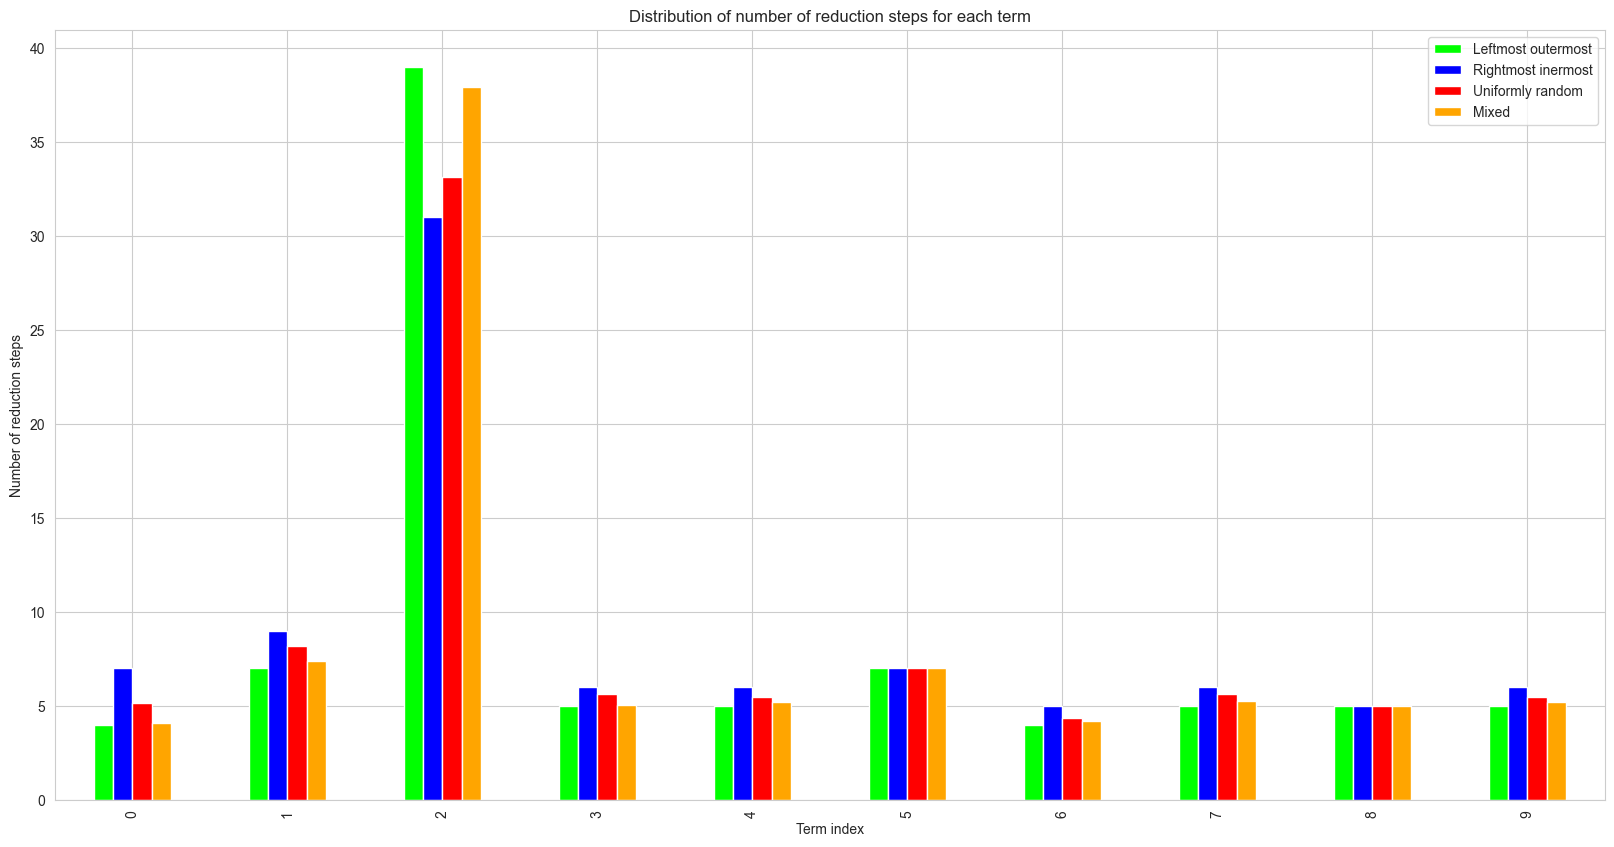

<AxesSubplot: title={'center': 'Distribution of number of reduction steps for each term'}, xlabel='Term index', ylabel='Number of reduction steps'>

In [22]:
colors = ['lime', 'blue', 'red', 'orange']
labels = ['Leftmost outermost', 'Rightmost inermost', 'Uniformly random', 'Mixed']
n = 20
draw_plot(stepsLO[10:n], stepsRI[10:n], stepsRand[10:n], MixedStrategySteps[10:n], labels, colors)

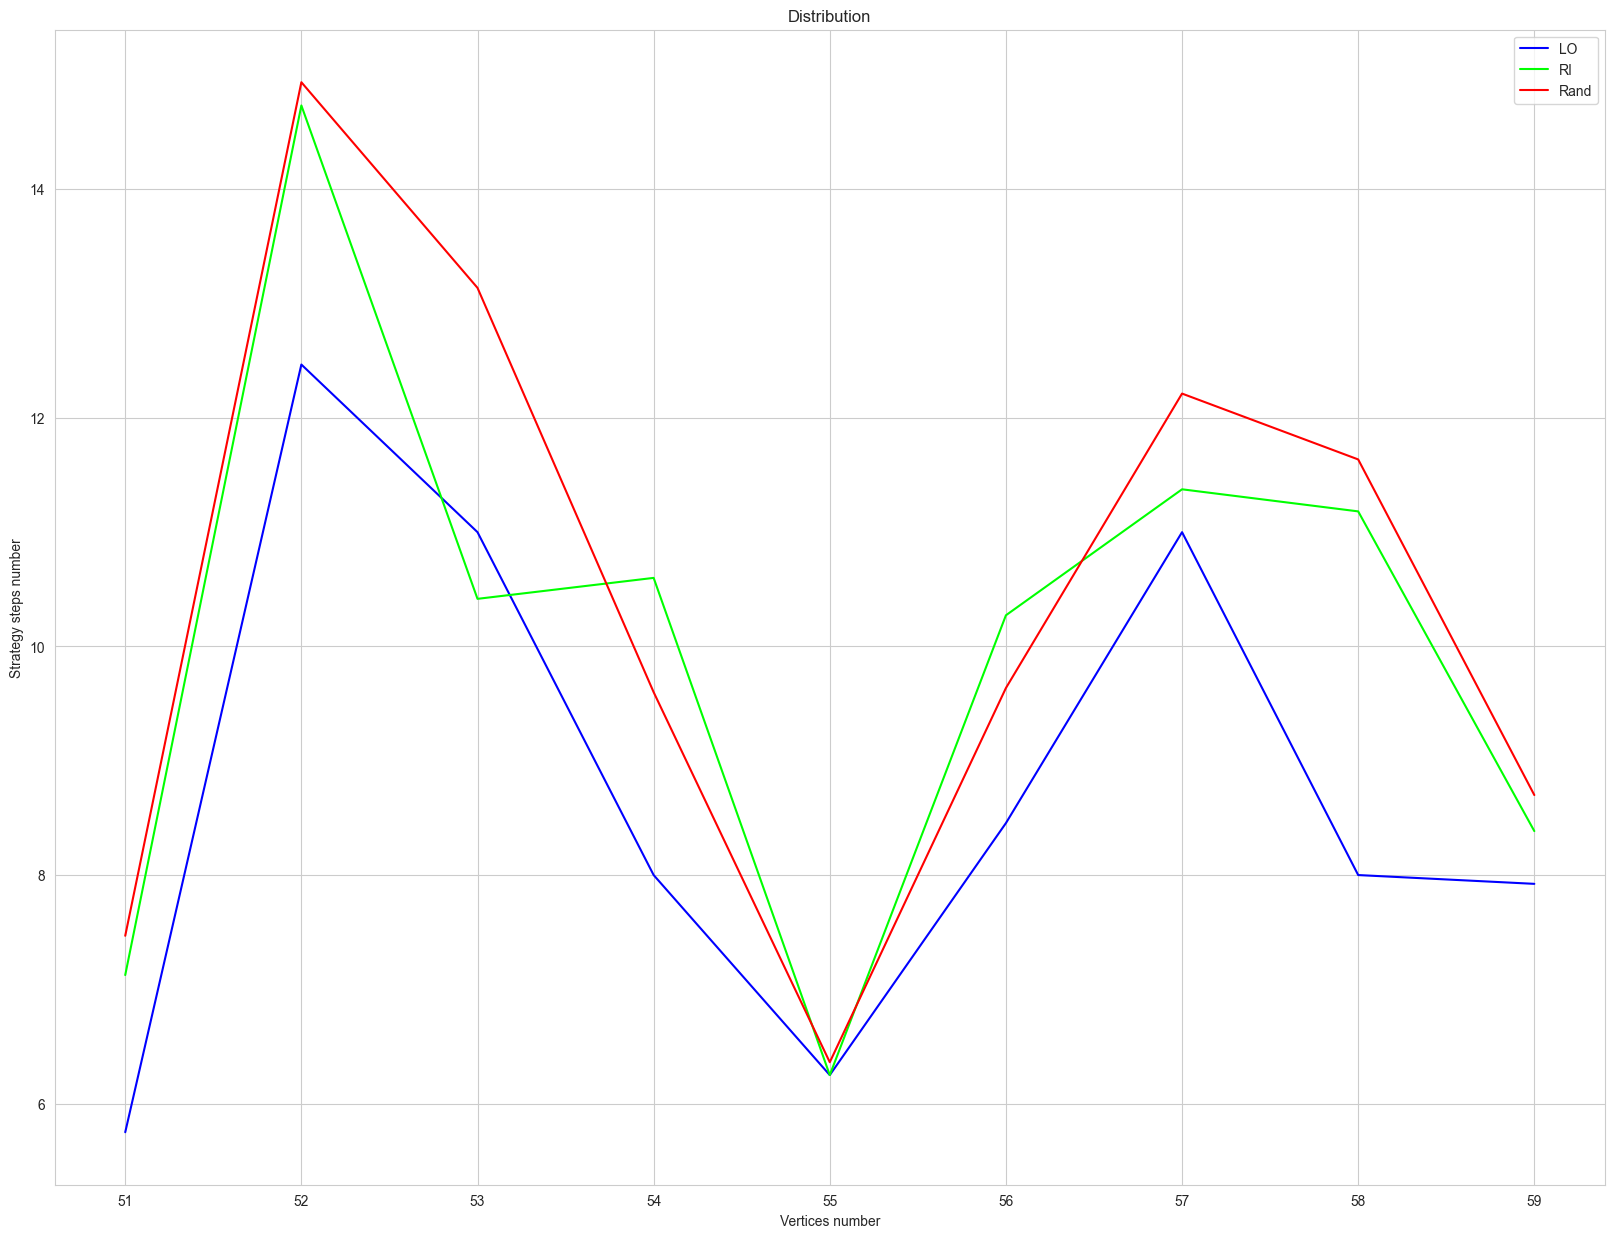

In [23]:
terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
    terms_dict[term.verticesNumber].append((term, {'LO': stepsLO[i], 'RI': stepsRI[i], 'Rand': stepsRand[i]}))

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
    data_without_inf = [d[1] for d in data if
                        d[1]['LO'] != float('inf') and d[1]['RI'] != float('inf') and d[1]['Rand'] != float('inf')]
    avgLO, avgRI, avgRand = 0, 0, 0
    for d in data_without_inf:
        avgLO += d['LO']
        avgRI += d['RI']
        avgRand += d['Rand']

    count = len(data_without_inf)
    if count != 0:
        average_term_data[verticesNumber] = {'LO': avgLO / count, 'RI': avgRI / count, 'Rand': avgRand / count}

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(list(average_term_data.keys()), [data['LO'] for i, data in average_term_data.items()], color='blue', label='LO')
ax.plot(list(average_term_data.keys()), [data['RI'] for i, data in average_term_data.items()], color='lime', label='RI')
ax.plot(list(average_term_data.keys()), [data['Rand'] for i, data in average_term_data.items()], color='red',
        label='Rand')
ax.set(title='Distribution',
       xlabel='Vertices number',
       ylabel='Strategy steps number')
ax.legend(prop={'size': 10})

plt.show()

## TESTS

In [24]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX),
                Abstraction(x, Application(Abstraction(y, Z),
                                           XZ
                                           ))
                )

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

((fun v[5932900] => ((v[5932900] v[5932900]) v[5932900])) (fun v[5932900] => ((fun v[5932901] => v[5932902]) (v[5932900] v[5932902]))))
	v[5932900]: {'free': 0, 'bound': 4}
	v[5932902]: {'free': 2, 'bound': 0}


In [25]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(x,
                         Abstraction(y,
                                     Application(
                                         Application(
                                             Abstraction(z, Application(Atom(y), Atom(z))),
                                             Application(Abstraction(w, Atom(w)), Atom(w))),
                                         Atom(v))))


def testTerm():
    assert (len(lambdaTerm.redexes) == 2)
    assert (lambdaTerm.verticesNumber == 13)

    subterm = Application(Atom(y), Atom(z))
    assert (lambdaTerm.subterm(1) == lambdaTerm)
    assert (lambdaTerm.subterm(6) == subterm)
    assert (lambdaTerm.setSubterm(1, subterm) == subterm)

    assert (lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber)
    assert (len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes))

    strategy = LeftmostOutermostStrategy()
    assert (len(lambdaTerm._betaConversion(strategy).redexes) == 1)
    assert (lambdaTerm._betaConversion(strategy).verticesNumber == 10)

    assert (len(lambdaTerm.normalize(strategy)[0].redexes) == 0)
    assert (lambdaTerm.normalize(strategy)[1] == 2)


def testStrategy():
    strategy = LeftmostOutermostStrategy()
    assert (strategy.redexIndex(lambdaTerm) == 4)


testTerm()
testStrategy()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.18it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.089490  1150.274560 -688.064050     inf      0.086764   
chi2             0.121240  1284.430546 -657.699607     inf      0.216061   
exponpow         0.121432  1199.759240 -657.541216     inf      0.179896   
rayleigh         0.135448  1474.649675 -651.223356     inf      0.272636   
powerlaw         0.144573   912.542305 -640.098315     inf      0.265063   

             ks_pvalue  
lognorm   4.153982e-01  
chi2      1.409177e-04  
exponpow  2.650295e-03  
rayleigh  4.655191e-07  
powerlaw  1.084432e-06  
{'lognorm': {'s': 0.9574669587567977, 'loc': 0.46396942060067653, 'scale': 5.197960460369675}}
Norm distribution: (8.76, 9.807262615021585)


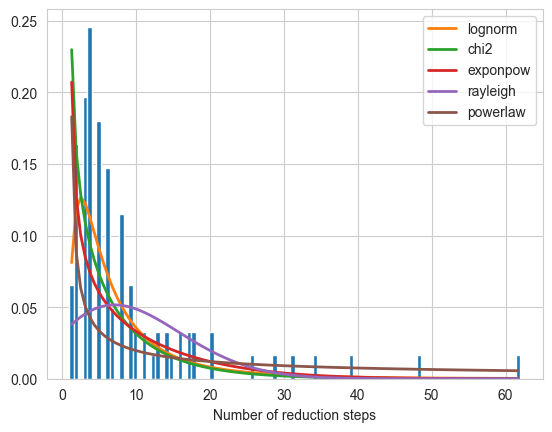

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 31.37it/s]

Log Norm distribution params: (1.7715498678582522, 0.8544589387565329); expected value = 8.47058782319101


In [26]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.06it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.089490  1150.274560 -688.064050     inf      0.086764   
chi2             0.121240  1284.430546 -657.699607     inf      0.216061   
exponpow         0.121432  1199.759240 -657.541216     inf      0.179896   
rayleigh         0.135448  1474.649675 -651.223356     inf      0.272636   
powerlaw         0.144573   912.542305 -640.098315     inf      0.265063   

             ks_pvalue  
lognorm   4.153982e-01  
chi2      1.409177e-04  
exponpow  2.650295e-03  
rayleigh  4.655191e-07  
powerlaw  1.084432e-06  
{'lognorm': {'s': 0.9574669587567977, 'loc': 0.46396942060067653, 'scale': 5.197960460369675}}
Norm distribution: (8.76, 9.807262615021585)


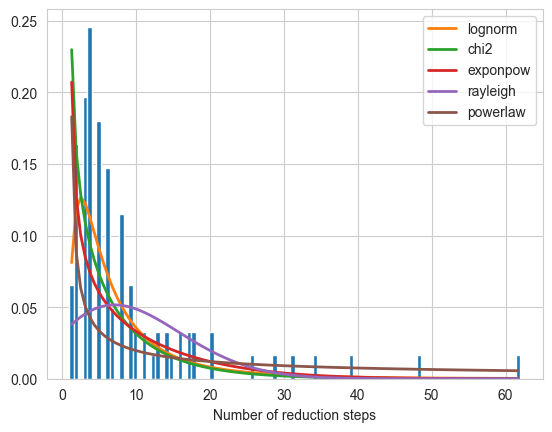

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 31.12it/s]

Log Norm distribution params: (1.7715498678582522, 0.8544589387565329); expected value = 8.47058782319101


In [27]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)